# Neanderthal 3D genome

by Evonne McArthur

Jupyter notebook for analysis and figure-generating code for the paper: 

Github:

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-dependencies,-import-model,-and-specify-paths" data-toc-modified-id="Import-dependencies,-import-model,-and-specify-paths-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import dependencies, import model, and specify paths</a></span></li><li><span><a href="#Functions-to-extract,-run,-format,-and-visualize-3D-genome-predictions" data-toc-modified-id="Functions-to-extract,-run,-format,-and-visualize-3D-genome-predictions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions to extract, run, format, and visualize 3D genome predictions</a></span></li><li><span><a href="#Fig-2---AH-&amp;-MH-3D-divergence-across-the-genome" data-toc-modified-id="Fig-2---AH-&amp;-MH-3D-divergence-across-the-genome-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fig 2 - AH &amp; MH 3D divergence across the genome</a></span><ul class="toc-item"><li><span><a href="#Generating-3D-genomes" data-toc-modified-id="Generating-3D-genomes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Generating 3D genomes</a></span></li><li><span><a href="#Comparing-3D-genomes" data-toc-modified-id="Comparing-3D-genomes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Comparing 3D genomes</a></span></li><li><span><a href="#Reading-in-comparisons" data-toc-modified-id="Reading-in-comparisons-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Reading in comparisons</a></span><ul class="toc-item"><li><span><a href="#Suppl.-Other-divergence-methods" data-toc-modified-id="Suppl.-Other-divergence-methods-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Suppl. Other divergence methods</a></span></li><li><span><a href="#Suppl.-Other-cell-type" data-toc-modified-id="Suppl.-Other-cell-type-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Suppl. Other cell type</a></span></li><li><span><a href="#Suppl.-Coverage-across-the-genome" data-toc-modified-id="Suppl.-Coverage-across-the-genome-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Suppl. Coverage across the genome</a></span></li></ul></li><li><span><a href="#Fig-2A" data-toc-modified-id="Fig-2A-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Fig 2A</a></span></li><li><span><a href="#Fig-2B" data-toc-modified-id="Fig-2B-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Fig 2B</a></span><ul class="toc-item"><li><span><a href="#Example-1" data-toc-modified-id="Example-1-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Example 1</a></span></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Example 2</a></span></li><li><span><a href="#Example-3" data-toc-modified-id="Example-3-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Example 3</a></span></li><li><span><a href="#Example-4" data-toc-modified-id="Example-4-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>Example 4</a></span></li></ul></li><li><span><a href="#Fig-2C" data-toc-modified-id="Fig-2C-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Fig 2C</a></span><ul class="toc-item"><li><span><a href="#Suppl.-Across-the-whole-genome" data-toc-modified-id="Suppl.-Across-the-whole-genome-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Suppl. Across the whole genome</a></span></li></ul></li></ul></li><li><span><a href="#Fig-3---3D-genome-organization-comparison-summarization" data-toc-modified-id="Fig-3---3D-genome-organization-comparison-summarization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fig 3 - 3D genome organization comparison summarization</a></span><ul class="toc-item"><li><span><a href="#Fig-3A" data-toc-modified-id="Fig-3A-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fig 3A</a></span></li></ul></li></ul></div>

## Import dependencies, import model, and specify paths

To ensure the proper packages are downloaded, use the conda environment `nean_3d` available in the `environment.yml` file

In [9]:
### Figures and basic packages used ###

# Figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('default') # set to your personal preference
import matplotlib.font_manager
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the figure title

import seaborn as sns
sns.set(color_codes=True) # Seaborn desaturates matplotlib colors (this is useful if you use both seaborn and basic matplot lib and want colors to be consistent)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
sys.setrecursionlimit(5000)

import numpy as np
np.random.seed(42)
import pandas as pd
import scipy.stats as stats


In [3]:
### For running Akita (CNN for predicting 3d genome organization) ###
# Details here: https://github.com/calico/basenji/blob/master/manuscripts/akita/

import os
import json
import subprocess
os.environ["CUDA_VISIBLE_DEVICES"] = '-1' ### run on CPU

import tensorflow as tf
print(tf.__version__)
if tf.__version__[0] == '1':
    tf.compat.v1.enable_eager_execution()

import pysam
from cooltools.lib.numutils import set_diag

from basenji import dataset, dna_io, seqnn
from matplotlib.pyplot import xticks, yticks
from scipy import stats
from multiprocessing import  Pool

import warnings
from itertools import chain


1.15.0


In [4]:
### load params, specify model ###

model_dir = './akita_model/'
params_file = model_dir+'params.json'
model_file  = model_dir+'model_best.h5'
with open(params_file) as params_open:
    params = json.load(params_open)
    params_model = params['model']
    params_train = params['train']

seqnn_model = seqnn.SeqNN(params_model)

### restore model ###
seqnn_model.restore(model_file)

### read data parameters ###
data_stats_file = model_dir+'/statistics.json'
with open(data_stats_file) as data_stats_open:
    data_stats = json.load(data_stats_open)
seq_length = data_stats['seq_length']
target_length = data_stats['target_length']
hic_diags =  data_stats['diagonal_offset']
target_crop = data_stats['crop_bp'] // data_stats['pool_width']
target_length1 = data_stats['seq_length'] // data_stats['pool_width']


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sequence (InputLayer)           [(None, 1048576, 4)] 0                                            
__________________________________________________________________________________________________
stochastic_reverse_complement ( ((None, 1048576, 4), 0           sequence[0][0]                   
__________________________________________________________________________________________________
stochastic_shift (StochasticShi (None, 1048576, 4)   0           stochastic_reverse_complement[0][
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 1048576, 4)   0           stochastic_shift[0][0]           
____________________________________________________________________________________________

## Functions to extract, run, format, and visualize 3D genome predictions
Largely adapted from  https://github.com/calico/basenji/blob/master/manuscripts/akita/explore_model.ipynb

In [17]:
### for converting from flattened upper-triangluar vector to symmetric matrix  ###
def from_upper_triu(vector_repr, matrix_len, num_diags):
    z = np.zeros((matrix_len,matrix_len))
    triu_tup = np.triu_indices(matrix_len,num_diags)
    z[triu_tup] = vector_repr
    for i in range(-num_diags+1,num_diags):
        set_diag(z, np.nan, i)
    return z + z.T

target_length1_cropped = target_length1 - 2*target_crop
print('flattened representation length:', target_length) 
print('symmetrix matrix size:', '('+str(target_length1_cropped)+','+str(target_length1_cropped)+')')


### This finds fasta files locally, change path to the location of the fasta genomes on your machine ###
def find_inFileLoc(indiv, chrm):
    if (indiv == "vindija") | (indiv == "altai") | (indiv == "denisova") | (indiv == "chagyrskaya"):   # if archaic
        in_file_loc = '/gpfs51/dors2/capra_lab/users/rinkerd/projects/3DNeand/data/genomes/%s/%s%s_hg19_masked.fa' % (indiv,chrm,indiv)
    elif 'SAS' not in indiv:
        in_file_loc = '/gpfs51/dors2/capra_lab/users/rinkerd/projects/3DNeand/data/genomes/1KG.individuals/%s/%s_%s_hg19_full.fa' % (indiv,chrm,indiv.split("_")[3])
    else:
        in_file_loc = '/dors/capra_lab/users/erin/RotationProject_Akita/data/genomes/1KG/%s/%s_%s_hg19_full.fa' % (indiv,chrm,indiv.split("_")[3])

    return in_file_loc

### Run Akita 3d genome predictions ###
def runAkitaPreds(seq):
    if len(seq) != 2**20: raise ValueError('len(seq) != seq_length')
    seq_1hot = dna_io.dna_1hot(seq)
    test_pred_from_seq = seqnn_model.model.predict(np.expand_dims(seq_1hot,0))
    return test_pred_from_seq

### Object that gets the sequence and 3d genome predictions for a window for a given individual ###
class extractFastaRunAkita:
    def __init__(self, indiv, chrm, start_loc):
        in_file_loc_indiv = find_inFileLoc(indiv, chrm)
        try:
            indiv_fasta_open = pysam.Fastafile(in_file_loc_indiv)
        except OSError:
            in_file_loc_indiv = '/dors/capra_lab/users/erin/RotationProject_Akita/data/genomes/1KG/%s/%s_%s_hg19_full.fa' % (indiv,chrm,indiv.split("_")[3])
            indiv_fasta_open = pysam.Fastafile(in_file_loc_indiv)

        mask_fasta_open = pysam.Fastafile('/gpfs51/dors2/capra_lab/users/rinkerd/projects/3DNeand/data/genomes/masked_hg19_reference/%s_hg19_archaic.masked.fa' % chrm) #for the masked
        human19_fasta_open = pysam.Fastafile('/dors/capra_lab/data/dna/human/hg19/%s.fa' % chrm)

        #extract sequences
        indiv_seq = indiv_fasta_open.fetch(chrm, start_loc, start_loc+2**20).upper()
        masked_seq = mask_fasta_open.fetch(chrm, start_loc, start_loc+2**20).upper() #for the masked 
        human19_seq = human19_fasta_open.fetch(chrm, start_loc, start_loc+2**20).upper()

        # important harmonization step! then run predictions on the harmonized sequence
        indiv_fillMissing_seq = "".join([r if m == "N" else r if s == "N" else s for r, m, s in zip(human19_seq, masked_seq, indiv_seq)])
        self.seq = indiv_fillMissing_seq
        indiv_pred  = runAkitaPreds(indiv_fillMissing_seq)
        indiv_pred_hff = indiv_pred[:,:,0][0] # save only hff
        self.pred = indiv_pred_hff
        
### Visualize the 3D genome predictions compared between two individuals for a particular region ### 

def compare3Dpreds(indiv1, indiv2, chrm, start, markerLabelInterval=0.1, defaultColor=True, vmin=-2,vmax=2,saveFig=False, lowLim=0,hiLim=448,icons = None):
    end = start + 2**20
    viz_start = start + (32+lowLim)*2048
    viz_end= start +(32+hiLim)*2048
    marker_labels = np.arange(np.floor(start/100000)/10, np.ceil((end)/100000)/10,markerLabelInterval)
    marker_labels = marker_labels[(marker_labels > viz_start/1000000) & (marker_labels < viz_end/1000000)]

    marker_loc = [(x*1000000-(start+(32*2048)))/2048 for x in marker_labels]

    indiv1_vector = extractFastaRunAkita(indiv1,chrm,start)
    indiv1_mat = from_upper_triu(indiv1_vector.pred, target_length1_cropped, hic_diags)
    indiv2_vector = extractFastaRunAkita(indiv2,chrm,start)
    indiv2_mat = from_upper_triu(indiv2_vector.pred, target_length1_cropped, hic_diags)

    fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3),gridspec_kw={'width_ratios': [3,3,3]});

    if not(defaultColor):
        cutoff = max(max(np.nanmax(indiv1_mat[lowLim:hiLim,lowLim:hiLim]),np.nanmax(indiv2_mat[lowLim:hiLim,lowLim:hiLim])),-1*min(np.nanmin(indiv1_mat[lowLim:hiLim,lowLim:hiLim]),np.nanmin(indiv2_mat[lowLim:hiLim,lowLim:hiLim])))
        vmax= cutoff
        vmin= -1*cutoff
        print(vmin,vmax)
        
        # Uncomment for custom legend
        #fig_legend,ax_legend = plt.subplots(figsize=(10,1.5));
        #ax_legend.matshow(np.array([np.linspace(vmin,vmax,100),np.linspace(vmin,vmax,100)]), cmap= 'RdBu_r', vmax=vmax, vmin=vmin);
        #ax_legend.set_xticks([99*(x-vmin)/(vmax-vmin) for x in [-1.5,-1.25,-1,-.75,-0.5,-0.25,0,.25,.5,.75,1,1.25,1.5]]);
        #ax_legend.set_xticklabels([-1.5,-1.25,-1,-.75,-0.5,-0.25,0,.25,.5,.75,1,1.25,1.5]);
        #plt.savefig("/home/mcarthe/legend.pdf")
        
    im = ax[0].matshow(indiv1_mat, cmap= 'RdBu_r', vmax=vmax, vmin=vmin);
    im = ax[1].matshow(indiv2_mat, cmap= 'RdBu_r', vmax=vmax, vmin=vmin);
    im = ax[2].matshow(indiv1_mat - indiv2_mat, cmap= 'PRGn_r', vmin=-0.5, vmax=0.5)    
    
    t = mpl.markers.MarkerStyle(marker='|');
    t._transform = t.get_transform().rotate_deg(-45);
        
    if icons != None:
        for i in icons:
            if isinstance(i, list): # for a region (like a gene)
                i_loc_start = (i[0]-(start+(32*2048)))/2048
                i_loc_end = (i[1]-(start+(32*2048)))/2048
                for i_loc in np.arange(i_loc_start,i_loc_end+0.25,0.25):
                    ax[0].scatter(x=i_loc,y=i_loc,marker = t,color='gray',s=50);
                    ax[1].scatter(x=i_loc,y=i_loc,marker = t,color='gray',s=50);
                    ax[2].scatter(x=i_loc,y=i_loc,marker = t,color='gray',s=50);
            else: # for a single point (like a snp)
                i_loc = (i-(start+(32*2048)))/2048
                ax[0].scatter(x=i_loc,y=i_loc,marker = '*',color='k',s=50);
                ax[1].scatter(x=i_loc,y=i_loc,marker = '*',color='k',s=50);
                ax[2].scatter(x=i_loc,y=i_loc,marker = '*',color='k',s=50);
                
    ax[0].scatter(x=marker_loc,y=marker_loc,marker = t,color='k',s=50);
    ax[1].scatter(x=marker_loc,y=marker_loc,marker = t,color='k',s=50);
    ax[2].scatter(x=marker_loc,y=marker_loc,marker = t,color='k',s=50);

    for loc,label in zip(marker_loc,marker_labels):
        _ = ax[0].text(loc - 15, loc+15, str(round(label,1)), horizontalalignment='center', verticalalignment='center', rotation=-45,fontsize=6);
        _ = ax[1].text(loc - 15, loc+15, str(round(label,1)), horizontalalignment='center', verticalalignment='center', rotation=-45,fontsize=6);
        _ = ax[2].text(loc - 15, loc+15, str(round(label,1)), horizontalalignment='center', verticalalignment='center', rotation=-45,fontsize=6);

    ax[0].title.set_text(indiv1)
    ax[1].title.set_text(indiv2)
    ax[0].set_xlim((lowLim,hiLim))
    ax[1].set_xlim((lowLim,hiLim))
    ax[2].set_xlim((lowLim,hiLim))
    ax[0].set_ylim((hiLim,lowLim))
    ax[1].set_ylim((hiLim,lowLim))
    ax[2].set_ylim((hiLim,lowLim))
    divergence = 1-stats.spearmanr(indiv1_vector.pred, indiv2_vector.pred)[0]
        
    print('%s:%s-%s 3D divergence score: %0.9f\nVisualized between %s:%s-%s' % (chrm, start, end, divergence,chrm,viz_start,viz_end))
    if saveFig:
        plt.savefig("/home/mcarthe/%s_%s_%s_%s.pdf" % (chrm, start,indiv1, indiv2))
    else:
        plt.show();
    # return indiv1_mat, indiv2_mat


flattened representation length: 99681
symmetrix matrix size: (448,448)


## Fig 2 - AH & MH 3D divergence across the genome

### Generating 3D genomes

In [ ]:
#!

### Comparing 3D genomes

In [ ]:
#!

### Reading in comparisons

In [433]:
comparisons_dir = '../results/3DgenomeComparisons/'

In [434]:
# 1 Mb Regions (chr and start coordinate) with full coverage in 1000G modern humans 
# (to calculate the end coordinate as a bedfile add 2^20 to the windowStartPos column. 
# Further data analysis considers only these regions
regionsToKeep = pd.read_csv("../data/regionsWithFullCoverage.csv")
regionsToKeep.head()

,chr,windowStartPos
0,chr1,524288
1,chr1,1048576
2,chr1,1572864
3,chr1,4194304
4,chr1,4718592


In [435]:
# Build a dictionary of 3D genome comparisons between all pairs of individuals 

arc_indivs = ['chagyrskaya', 'denisova', 'altai' ,'vindija']
afr_indivs = ['AFR_ESN_female_HG03105', 'AFR_GWD_female_HG03539', 'AFR_LWK_female_NA19378', 'AFR_MSL_female_HG03212', 'AFR_YRI_female_NA18870']
eas_indivs = ['EAS_CDX_female_HG00978', 'EAS_CHB_female_NA18595', 'EAS_CHS_female_HG00560', 'EAS_JPT_female_NA19077', 'EAS_KHV_female_HG01851']
eur_indivs = ['EUR_CEU_female_NA12006', 'EUR_FIN_female_HG00285', 'EUR_GBR_female_HG00261', 'EUR_IBS_female_HG01519', 'EUR_TSI_female_NA20795']
all_indivs = arc_indivs + afr_indivs + eas_indivs + eur_indivs

pairs = {}
for i1 in all_indivs :
    for i2 in all_indivs:
        try:
            pair = pd.read_csv(f"{comparisons_dir}withArchaics/3dcomp_{i1}_vs_{i2}.txt.gz",sep="\t")
            pair = regionsToKeep.merge(pair, how='inner',on=['chr','windowStartPos']) # only keep windows with full coverage in 1kg
            pair['3D_divergence'] = 1 - pair['spearman']
            pair = pair[['chr','windowStartPos','3D_divergence']]
            pairs[max(i1,i2),min(i1,i2)] = pair
        except FileNotFoundError:
            pass
        
# Example
pairs[('chagyrskaya','altai')].head()

len(pairs) # should be 171 (19 choose 2) when all pair-wise comparisons are finished


,chr,windowStartPos,3D_divergence
0,chr1,524288,0.000099
1,chr1,1048576,0.000052
2,chr1,1572864,0.000572
3,chr1,4194304,0.002690
4,chr1,4718592,0.000247


171

#### Suppl. Other divergence methods

In [420]:
# Read in the mse, spearman and pearson comparisons for all archaic - modern african comparisons (4 archaics * 5 africans * 4999 windows)
# Note that to make higher scores reflect more difference, the correlations are converted to a similarity score by 1-corr
comparisons = {'mse':[],'spearman':[],'pearson':[]}
for i1 in arc_indivs :
    for i2 in afr_indivs:
        try:
            pair = pd.read_csv(f"{comparisons_dir}withArchaics/3dcomp_{i1}_vs_{i2}.txt.gz",sep="\t")
            pair = regionsToKeep.merge(pair, how='inner',on=['chr','windowStartPos']) # only keep windows with full coverage in 1kg
            comparisons['mse'] += list(pair['mse'].values.flatten())
            comparisons['spearman'] += list(1 - pair['spearman'].values.flatten())
            comparisons['pearson'] += list(1 - pair['pearson'].values.flatten())
        except FileNotFoundError:
            pass

len(comparisons['mse'])

99980

In [421]:
labels = {'mse': '3D divergence based on Mean Squared Difference',
         'spearman': f'3D divergence based on Spearman correlation ($1-\\rho$)',
         'pearson':'3D divergence based on Pearson correlation ($1-r$)'}

def divergenceMethodComparisonFig(x, y,axisCutoff):
    g = sns.jointplot(x = np.clip(comparisons[x],a_max = np.quantile(comparisons[x],axisCutoff), a_min=None), 
                      y = np.clip(comparisons[y], a_max = np.quantile(comparisons[y],axisCutoff), a_min=None),
                      height=4,marginal_kws=dict(bins=100),kind='reg',scatter_kws={"s": 0.5, "alpha":0.05},ratio=5,
                      xlim=(0,np.quantile(comparisons[x],axisCutoff)),
                      ylim= (0,np.quantile(comparisons[y],axisCutoff)))
    
    g.set_axis_labels(labels[x], labels[y], fontsize=8)
    slope, intercept, r_value, p_value, std_err = stats.linregress(comparisons[x], comparisons[y])
    g.ax_joint.annotate(f'$r^2 = {r_value**2:.3f}, P = {p_value:.2g}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'lightgray'})
    return g
    #plt.savefig(f'/home/mcarthe/{y}_vs_{x}.pdf')


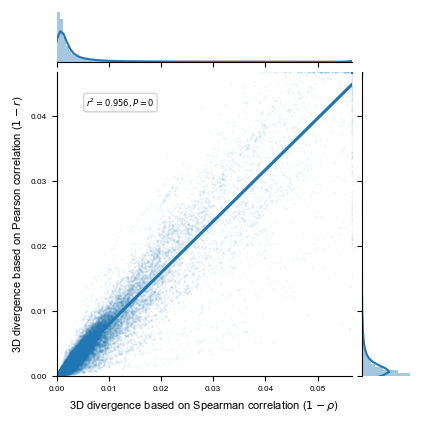

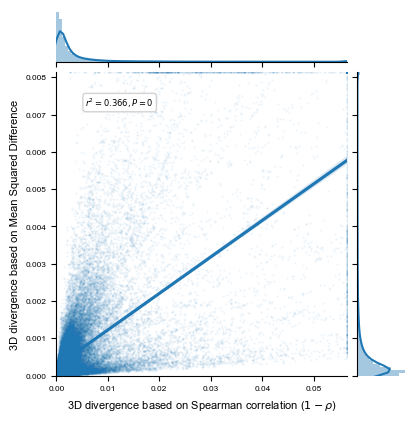

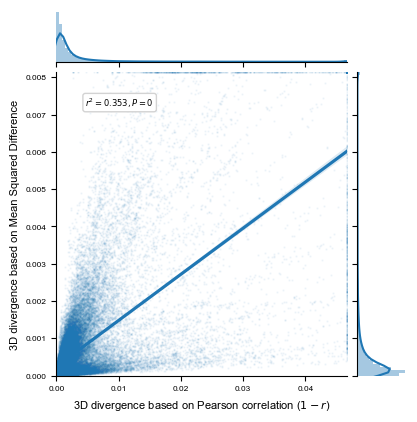

In [422]:
g1 = divergenceMethodComparisonFig('spearman', 'pearson',0.99)
g2 = divergenceMethodComparisonFig('spearman', 'mse', 0.99)
g3 = divergenceMethodComparisonFig('pearson','mse',0.99)

#### Suppl. Other cell type

In [ ]:
#!

#### Suppl. Coverage across the genome

In [385]:
from pybedtools import BedTool
missingness_dir = "../data/archaicMissingness/"

In [386]:
coverageRegions = regionsToKeep.copy(deep=True)
coverageRegions['end'] = pd.to_numeric(coverageRegions['windowStartPos'] + 2**20, downcast='integer')

def calculateCoverage(indiv):
    coverage = pd.DataFrame([])
    for i in list(range(1,23)) + ["X"]: # to specify correct file name
        if indiv == 'all':
            indiv_str = 'missing.in.at.least.one.archaic'
        else:
            indiv_str = f'missingin{indiv}'
        missing_subset = pd.read_csv(f"{missingness_dir}{indiv}/chr{i}{indiv_str}.bed",sep="\t",header=None)
        missing_subset = BedTool.from_dataframe(missing_subset)
        coverageRegions_subset = coverageRegions[coverageRegions['chr'] == f'chr{i}']
        coverageRegions_subset = BedTool.from_dataframe(coverageRegions_subset)
        coverage_subset = coverageRegions_subset.intersect(missing_subset,wao=True).to_dataframe(disable_auto_names=True, header=None)
        coverage_subset = coverage_subset.groupby([0,1,2]).agg({6:'sum'}).reset_index()
        coverage = pd.concat([coverage,coverage_subset])
    coverage.columns = ['chr','windowStartPos','end','coverage']
    coverage['coverage'] = 1 - (coverage['coverage'] / (2**20))

    return coverage


In [387]:
# Takes about 7 mins

# To include gaps for visualization
coordsTotal = [] 
for i, r in regionsToKeep.groupby('chr'):
    coordsTotal += [[i,int(x)] for x in np.arange(0,r['windowStartPos'].max()+1,2**20/2)] 
coverage_for_viz = pd.DataFrame(coordsTotal)
coverage_for_viz.columns = ['chr','windowStartPos']
coverage_for_viz['center_loc'] = (coverage_for_viz['windowStartPos'] + coverage_for_viz['windowStartPos'] + 2**20)/2 # center_loc is the midway point in the region

# Calculate coverage across the genome per individual
coverage = {}
for indiv in ['vindija','chagyrskaya','altai','denisova','all']:
    print(indiv)
    coverage[indiv] = calculateCoverage(indiv)
    coverage[indiv] = coverage_for_viz.merge(coverage[indiv], on=['chr','windowStartPos'], how='left')

vindija
chagyrskaya
altai
denisova
all


In [388]:
def plotSubsetChromsCoverage(coverage, chroms, ax, ax_i):
    x_labels_pos = []
    for i,indiv, color in zip([0,1,2,3,4],['vindija','chagyrskaya','altai','denisova','all'],['indigo','rebeccapurple','darkmagenta','darkblue','black']):
        x_shift = 0
        for alternate, chrm in zip(range(len(chroms)),chroms):
            x = coverage[indiv][coverage[indiv]['chr'] == chrm]['center_loc'] + x_shift
            y = coverage[indiv][coverage[indiv]['chr'] == chrm]['coverage']
            _ = ax[ax_i+i].plot(x,y,color=color, alpha=1, linewidth=.5)
            x_shift = max(x)+10000000
            x_labels_pos.append(np.mean(x))
            if (alternate % 2) == 0: # alternate gray and white background
                _ = ax[ax_i+i].axvspan(min(x) - 5000000, max(x) + 5000000, facecolor='lightgray')
            _ = ax[ax_i+i].set_ylim(0,1)


        if indiv == 'all':
            _ = ax[ax_i+i].set_yticks(np.arange(0,1+0.1,0.1))
            _ = ax[ax_i+i].set_yticklabels([0,"",0.2,"",0.4,"",0.6,"",0.8,"",1])
            _ = ax[ax_i+i].set_ylabel(indiv); 

        else:
            _ = ax[ax_i+i].set_yticks([0,.25,.5,.75,1])
            _ = ax[ax_i+i].set_yticklabels([0,"","","",1])
            _ = ax[ax_i+i].set_ylabel(indiv, rotation=0,horizontalalignment='right'); 


        _ = ax[ax_i+i].set_xticks(x_labels_pos)
        _ = ax[ax_i+i].set_xticklabels(chroms)
    return x_shift

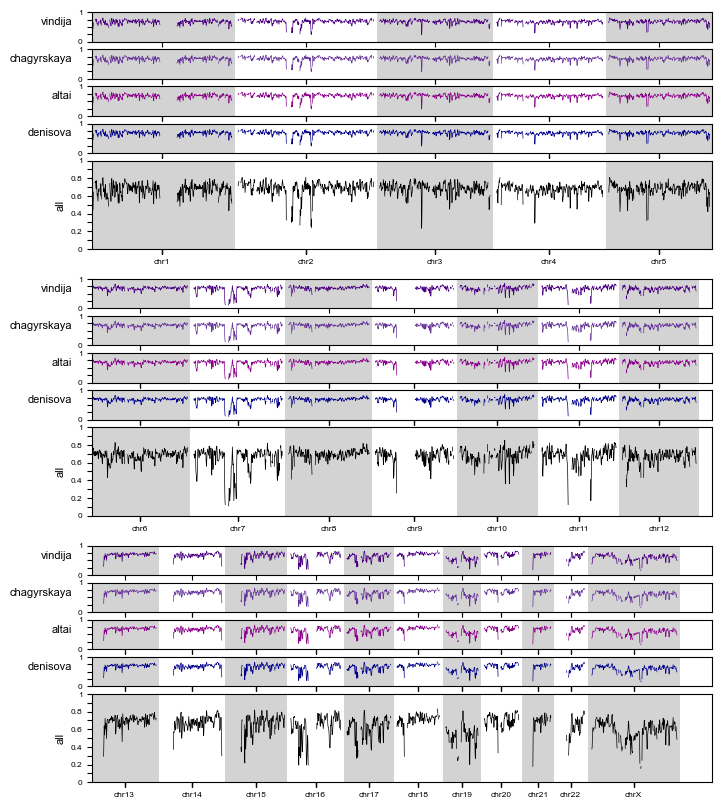

In [404]:
fig,ax = plt.subplots(nrows=17, ncols=1, figsize=(8,10), gridspec_kw={'height_ratios': [1,1,1,1,3,0.5,1,1,1,1,3,0.5,1,1,1,1,3]})

chroms = ['chr1','chr2','chr3','chr4','chr5']
ax_i = 0
max_x_shift = plotSubsetChromsCoverage(coverage, chroms, ax, ax_i)

fig.delaxes(ax[5])

chroms = ['chr6','chr7','chr8','chr9','chr10','chr11','chr12']
ax_i = 6
x_shift = plotSubsetChromsCoverage(coverage, chroms, ax, ax_i)
if x_shift > max_x_shift:
    max_x_shift = x_shift

fig.delaxes(ax[11])

chroms = ['chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX']
ax_i = 12
x_shift = plotSubsetChromsCoverage(coverage, chroms, ax, ax_i)
if x_shift > max_x_shift:
    max_x_shift = x_shift
    
for i in range(17):
    _ = ax[i].set_xlim(0,max_x_shift-5000000)
    
plt.savefig('/home/mcarthe/coverage.pdf',bbox_inches='tight')

### Fig 2A

In [61]:
# Make list of all pairwise comparisons across the genome between all archaic - african pairs
# 4 archaics * 5 africans * 4999 windows of the genome = 99980 comparisons
archaicPairwiseComparisons = []

for i in arc_indivs:
    for j in afr_indivs:
        archaicPairwiseComparisons += list(pairs[((max(i,j),min(i,j)))]['3D_divergence'].values.flatten())
            

len(archaicPairwiseComparisons)

99980

In [47]:
# Get percentile of 3D divergence for some examples in other parts of the paper

def percentileOf3Ddivergence(abs3DdivergenceLevel):
    return sum(np.array(archaicPairwiseComparisons) < abs3DdivergenceLevel)/len(archaicPairwiseComparisons)

percentileOf3Ddivergence(0.000678953)
percentileOf3Ddivergence(0.012364211)
percentileOf3Ddivergence(0.043153852)
percentileOf3Ddivergence(0.287417937)
percentileOf3Ddivergence(0.038298909)


0.29520904180836166

0.9326565313062612

0.9858571714342869

0.9994298859771954

0.9830966193238647

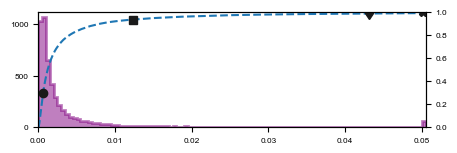

In [53]:
# Histogram of archaic-modern african 3d genome divergence

fig,ax=plt.subplots(figsize=(5,1.5))

# Hist
_ = ax.hist(np.clip(archaicPairwiseComparisons,a_min=None, a_max=0.0501),bins=list(np.arange(0,0.05+0.002,0.0005)),color='purple', alpha=0.5, histtype='step',fill='purple',linewidth=2)
_ = ax.set(xticks=np.linspace(0,0.05,6), xlim=(0,0.0505),ylim=(0,None),yticks=[0,500/4999*99980,1000/4999*99980,],yticklabels=[0,500,1000],)

# CDF
ax2 = ax.twinx()
y = np.histogram(archaicPairwiseComparisons,bins=list(np.arange(0,1+0.0001,0.0001)))
_ = ax2.plot((y[1] - 0.0001/2),np.cumsum(np.append([0],y[0]/99980)),'--')

# Points of interest
_ = ax2.plot(0.000678953,percentileOf3Ddivergence(0.000678953),marker="o",markersize=6, color='k')
_ = ax2.plot(0.012364211,percentileOf3Ddivergence(0.012364211),marker="s",markersize=6, color='k')
_ = ax2.plot(0.043153852,percentileOf3Ddivergence(0.043153852),marker="d",markersize=6, color='k')
_ = ax2.plot(0.0501,percentileOf3Ddivergence(0.287417937),marker="X",markersize=6, color='k')
_ = ax2.set(ylim=(0,1))

# plt.savefig('/home/mcarthe/histogram.pdf')

### Fig 2B

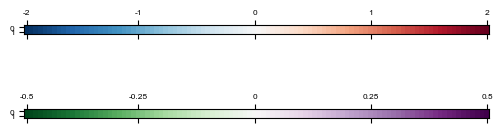

In [12]:
# Legend for 3d genome organization figures

fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6,2));

ax[0].matshow(np.array([np.linspace(-2,2,100),np.linspace(-2,2,100)]), cmap= 'RdBu_r', vmax=2, vmin=-2);
ax[1].matshow(np.array([np.linspace(-0.5,0.5,100),np.linspace(-0.5,0.5,100)]), cmap= 'PRGn_r', vmax=0.5, vmin=-0.5);
ax[0].set_xticks([0,24,49,74,99]);
ax[0].set_xticklabels([-2,-1,0,1,2]);
ax[1].set_xticks([0,24,49,74,99]);
ax[1].set_xticklabels([-0.5,-.25,0,0.25,0.5]);
#plt.savefig("/home/mcarthe/legend.pdf");


#### Example 1

chr16:6291456-7340032 3D divergence score: 0.000678953
Visualized between chr16:6356992-7274496


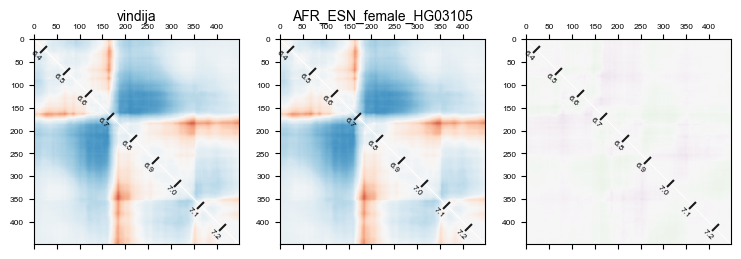

In [18]:
indiv1 = 'vindija'
indiv2 = 'AFR_ESN_female_HG03105'
chrm='chr16'
start = 6291456
compare3Dpreds(indiv1, indiv2, chrm, start)#, saveFig=True)
# chr16   6291456 0.7369852066040039      1.0     0.7295608520507812      1.0     0.9972105026245117 1.0 0.7341518402099609


#### Example 2

chr13:108003328-109051904 3D divergence score: 0.012364211
Visualized between chr13:108068864-108986368


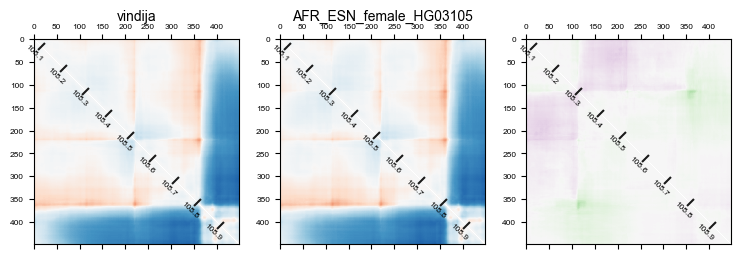

In [19]:
indiv1 = 'vindija'
indiv2 = 'AFR_ESN_female_HG03105'
chrm = 'chr13'
start = 108003328
compare3Dpreds(indiv1, indiv2, chrm, start)#, saveFig=True)

#### Example 3

chr1:233832448-234881024 3D divergence score: 0.043153852
Visualized between chr1:233897984-234815488


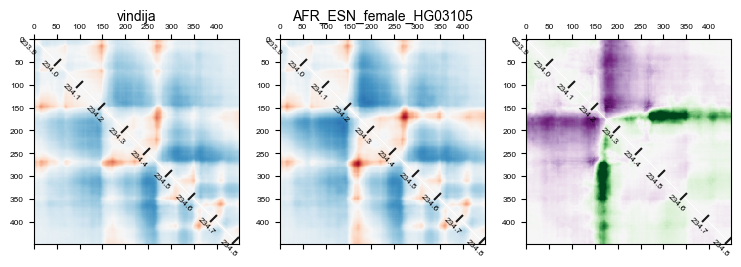

In [20]:
indiv1 = 'vindija'
indiv2 = 'AFR_ESN_female_HG03105'
chrm = 'chr1'
start = 233832448
compare3Dpreds(indiv1, indiv2, chrm, start)#, saveFig=True)

#### Example 4

chr5:24117248-25165824 3D divergence score: 0.287417937
Visualized between chr5:24182784-25100288


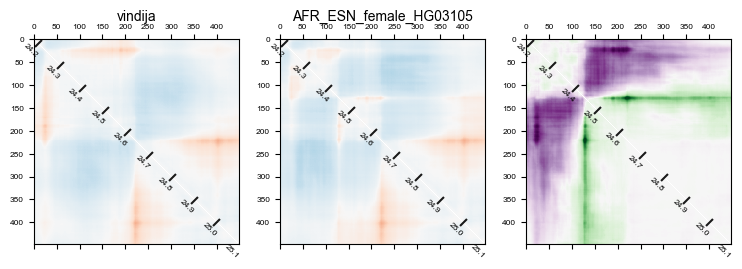

In [21]:
indiv1 = 'vindija'
indiv2 = 'AFR_ESN_female_HG03105'
chrm = 'chr5'
start = 24117248
#chr5    24117248        0.6796903610229492      1.0     0.6795988082885742      1.0     0.998814582824707       1.0     0.6785030364990234
compare3Dpreds(indiv1, indiv2, chrm, start)#, saveFig=True)

### Fig 2C

In [398]:
# Get average divergence & max/min divergence all archaic-modern african pairs across the genome (include gaps for visualization purposes)

# To include gaps for visualization
coordsTotal = []
for i, r in regionsToKeep.groupby('chr'):
    coordsTotal += [[i,int(x)] for x in np.arange(0,r['windowStartPos'].max()+1,2**20/2)]

comps_for_viz = pd.DataFrame(coordsTotal)
comps_for_viz.columns = ['chr','windowStartPos']
comps_for_viz['center_loc'] = (comps_for_viz['windowStartPos'] + comps_for_viz['windowStartPos'] + 2**20)/2 # center_loc is the midway point in the region

for i in arc_indivs:
    for j in afr_indivs:
        pair = pairs[((max(i,j),min(i,j)))]
        pair.columns = ['chr','windowStartPos',f'{i}_{j}']
        comps_for_viz = comps_for_viz.merge(pair, on = ['chr','windowStartPos'],how='left')
    comps_for_viz[f'{i}_mean'] = comps_for_viz[[f'{i}_{x}' for x in afr_indivs]].mean(axis=1)
    stderr = comps_for_viz[[f'{i}_{x}' for x in afr_indivs]].std(axis=1)/np.sqrt(5)
    comps_for_viz[f'{i}_loCI'] = comps_for_viz[f'{i}_mean'] - 1.96*stderr
    comps_for_viz[f'{i}_hiCI'] = comps_for_viz[f'{i}_mean'] + 1.96*stderr
    comps_for_viz = comps_for_viz.drop(columns=[f'{i}_{x}' for x in afr_indivs])

comps_for_viz.head()


,chr,windowStartPos,center_loc,chagyrskaya_mean,chagyrskaya_loCI,chagyrskaya_hiCI,denisova_mean,denisova_loCI,denisova_hiCI,altai_mean,altai_loCI,altai_hiCI,vindija_mean,vindija_loCI,vindija_hiCI
0,chr1,0,524288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,524288,1048576.0,0.001813,0.001356,0.002271,0.001441,0.000878,0.002005,0.001790,0.001433,0.002147,0.001586,0.001130,0.002041
2,chr1,1048576,1572864.0,0.002230,0.001534,0.002925,0.002745,0.001903,0.003587,0.002038,0.001395,0.002681,0.002763,0.002009,0.003517
3,chr1,1572864,2097152.0,0.001980,0.001084,0.002876,0.002388,0.001168,0.003609,0.001942,0.001214,0.002670,0.002566,0.001666,0.003466
4,chr1,2097152,2621440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


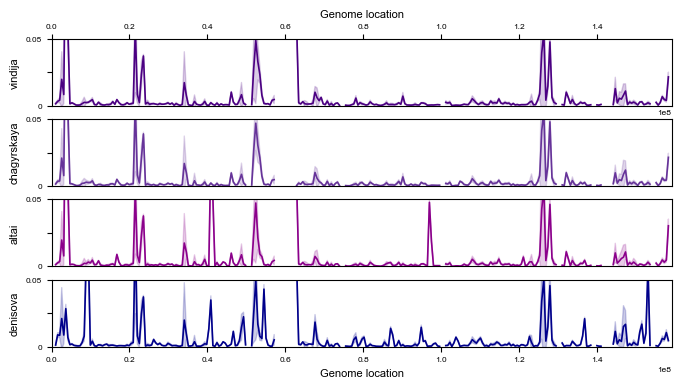

In [399]:
chrm = 'chr7'

fig,ax = plt.subplots(nrows=4, ncols=1, figsize=(8,4));

for i,indiv, color in zip([0,1,2,3],['vindija','chagyrskaya','altai','denisova'],['indigo','rebeccapurple','darkmagenta','darkblue']):
    ax[i].set_facecolor('white')
    
    x = comps_for_viz[comps_for_viz['chr'] == chrm]['center_loc']
    meanVals = comps_for_viz[comps_for_viz['chr'] == chrm][f'{indiv}_mean']
    minVals = comps_for_viz[comps_for_viz['chr'] == chrm][f'{indiv}_loCI']
    maxVals = comps_for_viz[comps_for_viz['chr'] == chrm][f'{indiv}_hiCI']
    
    _ = ax[i].plot(x,meanVals,color=color, alpha=1, linewidth=1.2)
    _ = ax[i].fill_between(x, minVals, maxVals, color=color,alpha=0.2)
    _ = ax[i].set_ylim(0,0.05)
    _ = ax[i].set_xlim(0,159138663) # len chr7 hg19 coords
    _ = ax[i].set_ylabel(indiv); 
    _ = ax[i].set_yticks([0,0.025,0.05])
    _ = ax[i].set_yticklabels([0,"",0.05])

    if i == 0:
        ax[i].xaxis.tick_top()
        _ = ax[i].set_xlabel('Genome location');   
        ax[i].xaxis.set_label_position('top')
    elif i == 3:
        _ = ax[i].set_xlabel('Genome location');   
    else:
        _ = ax[i].set_xticks([])
        _ = ax[i].set_xlabel('')

#plt.savefig('/home/mcarthe/chr7.pdf')

#### Suppl. Across the whole genome

In [400]:
def plotSubsetChroms(comps_for_viz, chroms, ax, ax_i):
    x_labels_pos = []
    for i,indiv, color in zip([0,1,2,3],['vindija','chagyrskaya','altai','denisova'],['indigo','rebeccapurple','darkmagenta','darkblue']):
        x_shift = 0
        for alternate, chrm in zip(range(len(chroms)),chroms):
            x = comps_for_viz[comps_for_viz['chr'] == chrm]['center_loc'] + x_shift
            meanVals = comps_for_viz[comps_for_viz['chr'] == chrm][f'{indiv}_mean']
            minVals = comps_for_viz[comps_for_viz['chr'] == chrm][f'{indiv}_loCI']
            maxVals = comps_for_viz[comps_for_viz['chr'] == chrm][f'{indiv}_hiCI']
            _ = ax[ax_i+i].fill_between(x, minVals, maxVals, color=color,alpha=0.2)
            _ = ax[ax_i+i].plot(x,meanVals,color=color, alpha=1, linewidth=.5)
            _ = ax[ax_i+i].set_ylim(0,0.05)
            x_shift = max(x)+10000000
            x_labels_pos.append(np.mean(x))
            if (alternate % 2) == 0: # alternate gray and white background
                _ = ax[ax_i+i].axvspan(min(x) - 5000000, max(x) + 5000000, facecolor='k',alpha=0.1)

        _ = ax[ax_i+i].set_ylabel(indiv); 
        _ = ax[ax_i+i].set_yticks([0,0.025,0.05])
        _ = ax[ax_i+i].set_yticklabels([0,"",0.05])
        _ = ax[ax_i+i].set_xticks(x_labels_pos)
        _ = ax[ax_i+i].set_xticklabels(chroms)
    return x_shift

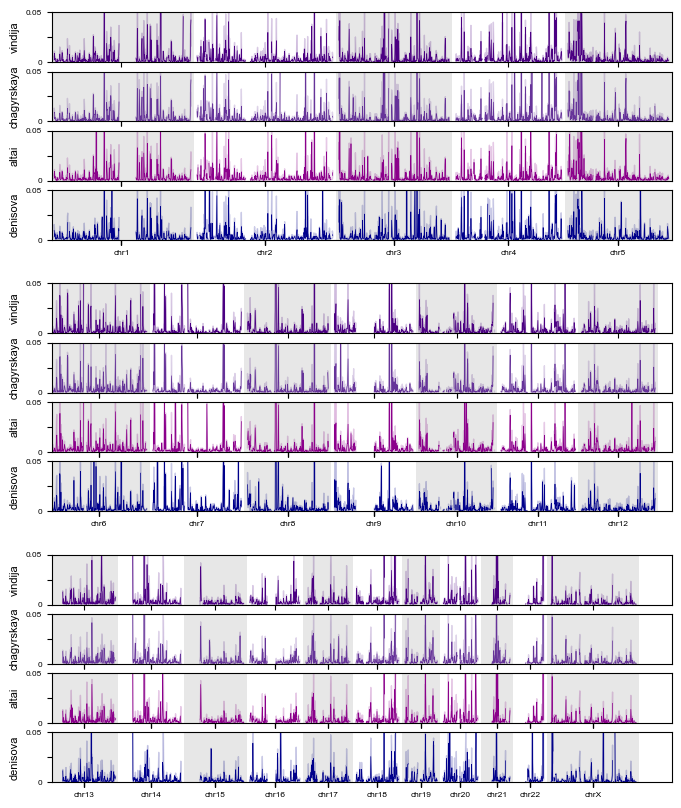

In [403]:
fig,ax = plt.subplots(nrows=14, ncols=1, figsize=(8,10), gridspec_kw={'height_ratios': [1,1,1,1,0.5,1,1,1,1,0.5,1,1,1,1]})

chroms = ['chr1','chr2','chr3','chr4','chr5']
ax_i = 0
max_x_shift = plotSubsetChroms(comps_for_viz, chroms, ax, ax_i)

fig.delaxes(ax[4])

chroms = ['chr6','chr7','chr8','chr9','chr10','chr11','chr12']
ax_i = 5
x_shift = plotSubsetChroms(comps_for_viz, chroms, ax, ax_i)
if x_shift > max_x_shift:
    max_x_shift = x_shift

fig.delaxes(ax[9])

chroms = ['chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX']
ax_i = 10
x_shift = plotSubsetChroms(comps_for_viz, chroms, ax, ax_i)
if x_shift > max_x_shift:
    max_x_shift = x_shift
    
for i in range(14):
    _ = ax[i].set_xlim(0,max_x_shift-5000000)
    
#plt.savefig('/home/mcarthe/wholeGenome.pdf',bbox_inches='tight')

## Fig 3 - 3D genome organization comparison summarization

### Fig 3A

In [453]:
all_indivs = arc_indivs + afr_indivs + eas_indivs + eur_indivs
matrix = pd.DataFrame(index=all_indivs, columns=all_indivs,dtype='float')
for i in all_indivs:
    for j in all_indivs:
        if i != j:
            matrix.loc[i,j] = pairs[max(i,j),min(i,j)][['3D_divergence']].mean().values[0]
            matrix.loc[j,i] = pairs[max(i,j),min(i,j)][['3D_divergence']].mean().values[0]
        else:
            matrix.loc[i,i] = 0
    

chagyrskaya               float64
denisova                  float64
altai                     float64
vindija                   float64
AFR_ESN_female_HG03105    float64
AFR_GWD_female_HG03539    float64
AFR_LWK_female_NA19378    float64
AFR_MSL_female_HG03212    float64
AFR_YRI_female_NA18870    float64
EAS_CDX_female_HG00978    float64
EAS_CHB_female_NA18595    float64
EAS_CHS_female_HG00560    float64
EAS_JPT_female_NA19077    float64
EAS_KHV_female_HG01851    float64
EUR_CEU_female_NA12006    float64
EUR_FIN_female_HG00285    float64
EUR_GBR_female_HG00261    float64
EUR_IBS_female_HG01519    float64
EUR_TSI_female_NA20795    float64
dtype: object

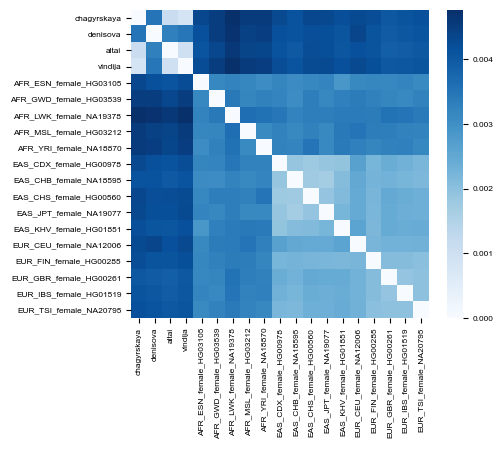

In [455]:
matrix.dtypes
fig, ax = plt.subplots(figsize=(4.8,4))         # Sample figsize in inches
sns.heatmap(matrix,cmap='Blues')